# ScikitLearn XGBoost Regression: Life Expectancy Prediction

Trains an XG-Boost model to predict life expectancy using scikit-learn. This data was initially obtained from World Health Organization (WHO) and United Nations Website. Data contains features like year, status, life expectancy, adult mortality, infant deaths, percentage of expenditure, alcohol etc.

- Tasks:
    - Perform exploratory data analysis
    - Train an XG-boost algorithm in Scikit-Learn
    - Assess trained model performance
    - Plot trained model predictions vs. ground truth output

- Inputs (Features):
    - GRE Scores (out of 340)
    - TOEFL Scores (out of 120)
    - University Rating (out of 5)
    - Statement of Purpose (SOP) 
    - Letter of Recommendation (LOR) Strength (out of 5)
    - Undergraduate GPA (out of 10)
    - Research Experience (either 0 or 1)

- Outputs:
    - Chance of admission (ranging from 0 to 1)

In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

## 1. Perform Exploratory Data Analysis (EDA)

In [27]:
# Read the CSV file 
life_expectancy_df = pd.read_csv("data/Life_Expectancy_Data.csv")

In [28]:
# Load the top 6 instances
life_expectancy_df.head(6)

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,16.7,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2


In [29]:
# List column data types
life_expectancy_df.dtypes

Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [30]:
# Check the shape of the dataframe
life_expectancy_df.shape

(2938, 21)

In [31]:
# Check if any missing values are present in the dataframe
life_expectancy_df.isnull().sum()

Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [32]:
# drop rows containing null data
life_expectancy_df = life_expectancy_df.dropna()

In [33]:
# Confirm rows containg null data have been removed
life_expectancy_df.isnull().sum()

Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

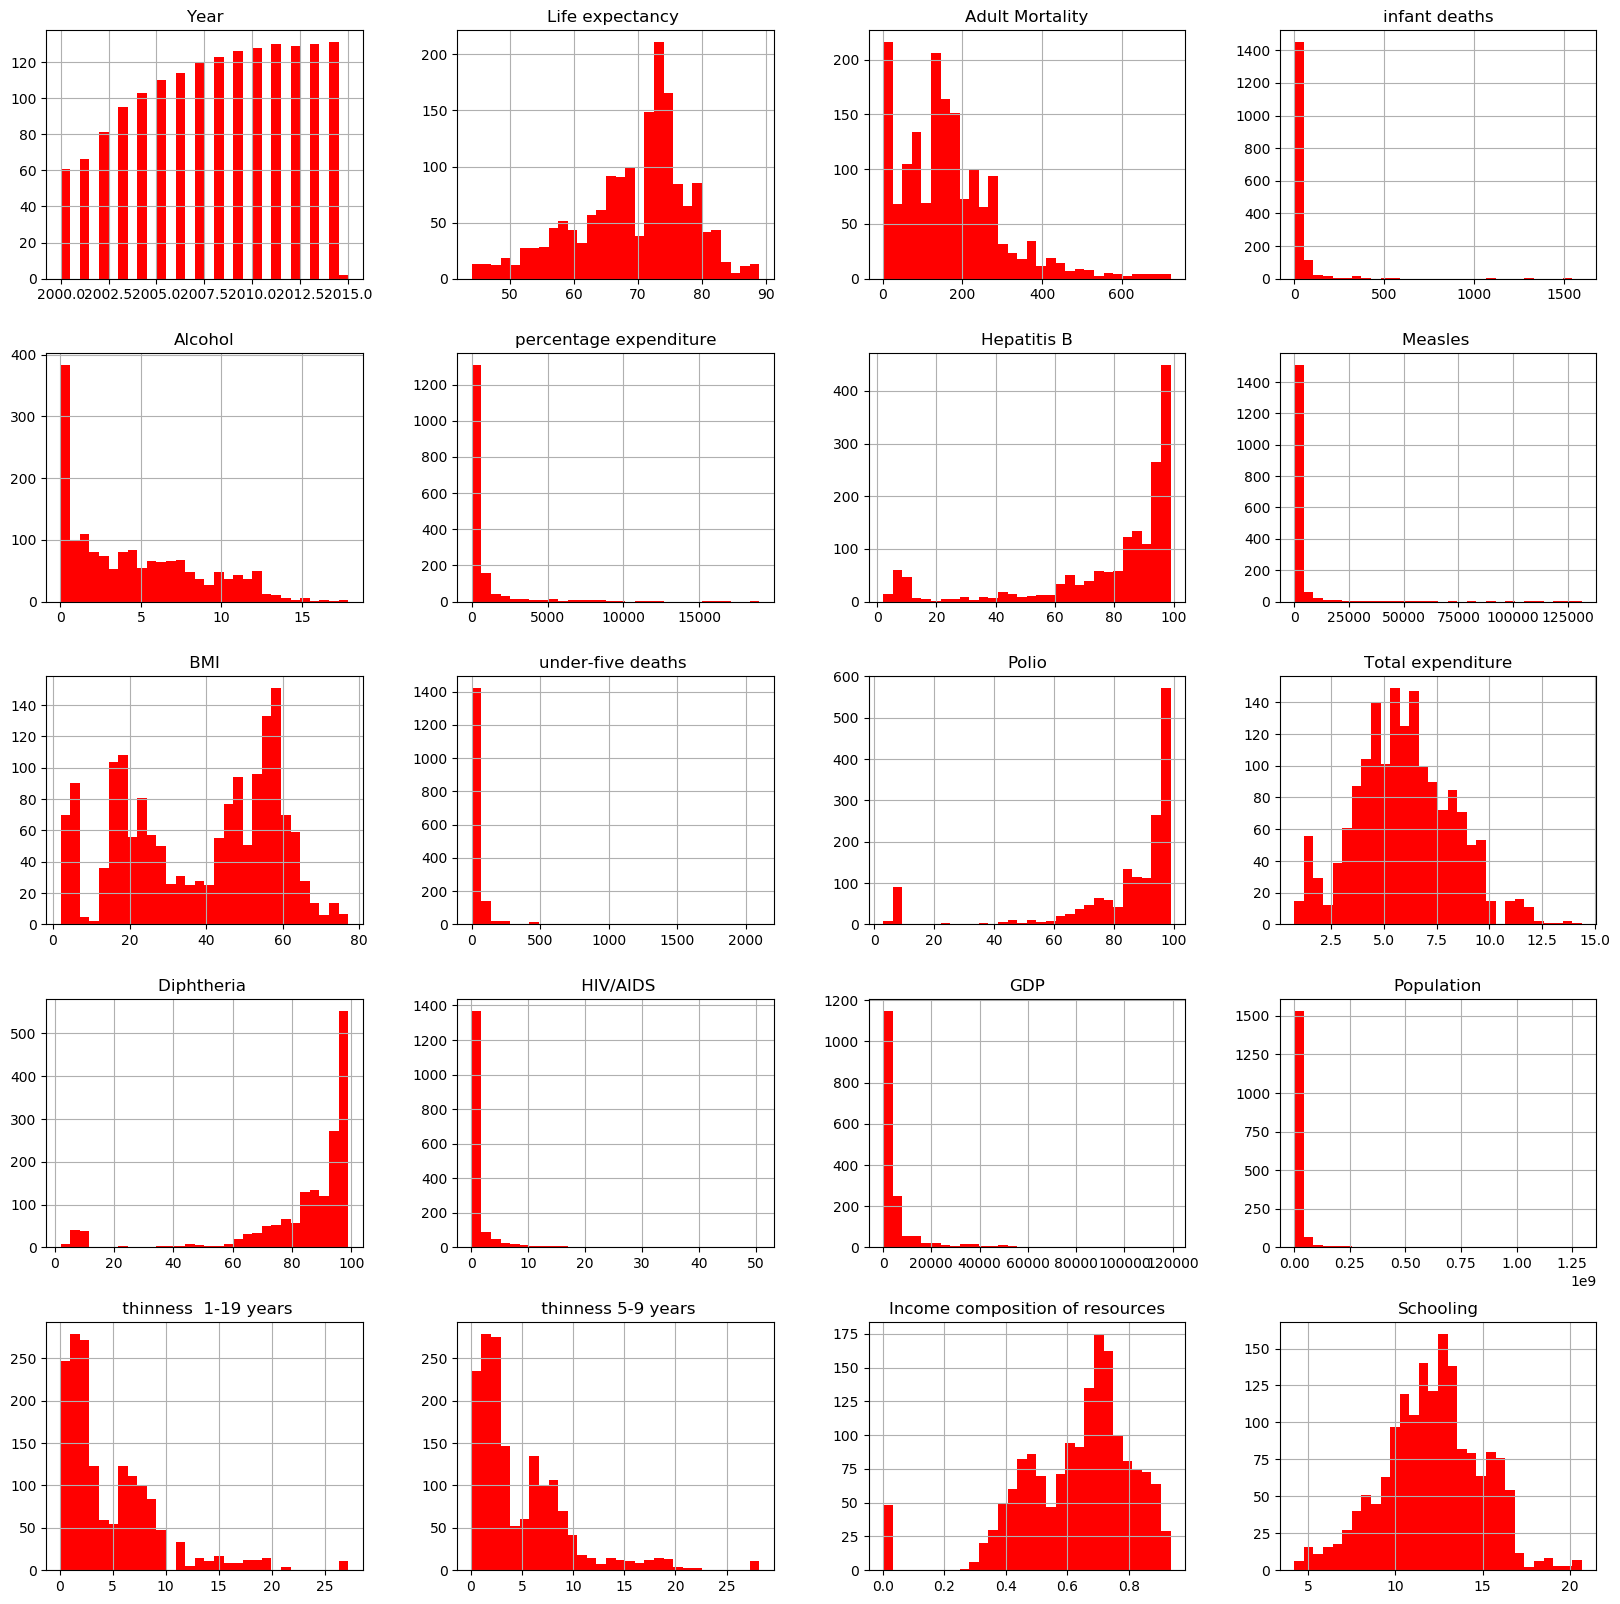

In [34]:
# Show life expectancy info on a histogram
life_expectancy_df.hist(bins = 30, figsize = (20,20), color = 'r');
plt.show()

In [38]:
# List columns
life_expectancy_df.columns

Index(['Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [46]:
# Correct name of 'Life expectancy ' column to 'Life expectancy'
life_expectancy_df = life_expectancy_df.rename(columns={'Life expectancy ':'Life expectancy'})
life_expectancy_df['Life expectancy'].shape

(1649,)

In [56]:
# Perform One-Hot Encoding on 'Status' column
life_expectancy_df = pd.get_dummies(life_expectancy_df, columns=['Status'])
life_expectancy_df

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developed,Status_Developing
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,1
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,1
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,...,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,0,1
2934,2003,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,...,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,0,1
2935,2002,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,...,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,0,1
2936,2001,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,...,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,0,1


## 2. Train an XG-boost algorithm in Scikit-Learn

In [57]:
# Assign all features except life expectancy to X
X = life_expectancy_df.drop(columns = ['Life expectancy'])

# Assign Life expectancy feature to y
y = life_expectancy_df['Life expectancy']

In [75]:
# Convert to numpy arrays
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

# reshaping the array from (1000,) to (1000, 1)
y = y.reshape(-1,1)
y.shape

(1649, 1)

In [59]:
# Split data into training data and test dataq
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [60]:
# Confirm shape of X_train data (should be 75%)
X_train.shape

(1236, 21)

In [61]:
# Confirm shape of X_test data (should be 25%)
X_test.shape

(413, 21)

In [62]:
# Train an XGBoost regressor model 
model = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.1, max_depth = 30, n_estimators = 100)
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=30, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=0, reg_alpha=0, ...)

## 3. Assess trained model performance

In [63]:
# Predict the score of the trained model using the testing dataset
result = model.score(X_test, y_test)
print("Accuracy : {}".format(result))

Accuracy : 0.944551611617439


In [70]:
# Make predictions on the test data
y_predict = model.predict(X_test)
y_predict

array([74.32778 , 74.18248 , 69.950745, 73.698456, 74.64724 , 64.6156  ,
       73.26598 , 51.047718, 65.099174, 66.591354, 66.78468 , 53.150852,
       71.556145, 68.61955 , 78.99312 , 82.12321 , 72.86041 , 70.33207 ,
       53.0789  , 73.598724, 44.715225, 59.31575 , 78.75657 , 79.097916,
       74.94293 , 72.89254 , 75.16571 , 74.538826, 72.55671 , 75.57128 ,
       79.73172 , 73.90718 , 71.913704, 65.5039  , 74.800995, 46.48838 ,
       72.15555 , 63.285458, 60.660576, 58.569916, 69.83052 , 81.336426,
       76.00407 , 64.77251 , 69.92796 , 53.6735  , 55.305912, 66.77876 ,
       62.619236, 83.4735  , 68.1159  , 73.98373 , 62.626938, 69.56186 ,
       72.06579 , 64.16547 , 48.38167 , 76.99798 , 80.704315, 73.61244 ,
       53.570908, 63.674   , 82.5157  , 62.610985, 74.26199 , 73.5699  ,
       52.716812, 49.151184, 74.377426, 72.97554 , 68.15955 , 68.81093 ,
       76.81114 , 64.002686, 60.191097, 68.39907 , 80.91005 , 58.54781 ,
       46.609383, 73.04014 , 79.332306, 59.872196, 

In [71]:
# Print out metrics
k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 2.06 
MSE = 4.244355368817642 
MAE = 1.316627254901729 
R2 = 0.944551611617439 
Adjusted R2 = 0.94157356518257


## 4. Plot trained model predictions vs. ground truth output

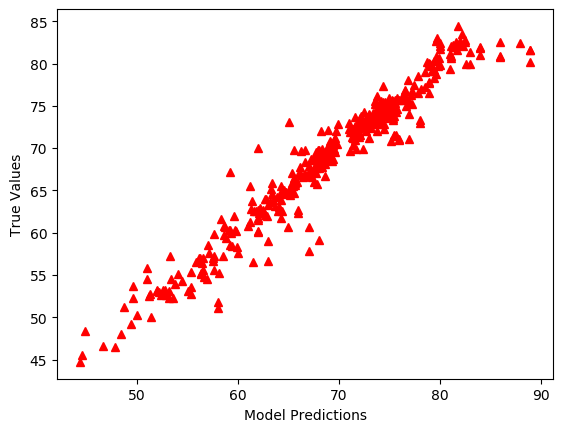

In [74]:
# Plot the scaled result
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')
plt.show()